In [1]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion
from astropy.io import fits


                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer


In [4]:
#SDSS data for z < 0.6


hdu_list = fits.open('support_files/emission_lines_v5.0_4.fits')
data = hdu_list[1].data
# show the first two rows
first_two_rows = data[:2]
#rint(first_two_rows)
#print (hdu_list[1].columns) # print the names of the columns


#MOSFIRE data for z ~ 2

hdu_list2 = fits.open('support_files/J_ApJ_795_165_table1.dat.fits')  # open a FITS file
data2 = hdu_list2[1].data  # assume the first extension is a table
# show the first two rows
first_two_rows = data2[:2]
#print(first_two_rows)

#print (hdu_list2[1].columns) # print the names of the columns




/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encounter

(261054,) (261054,)


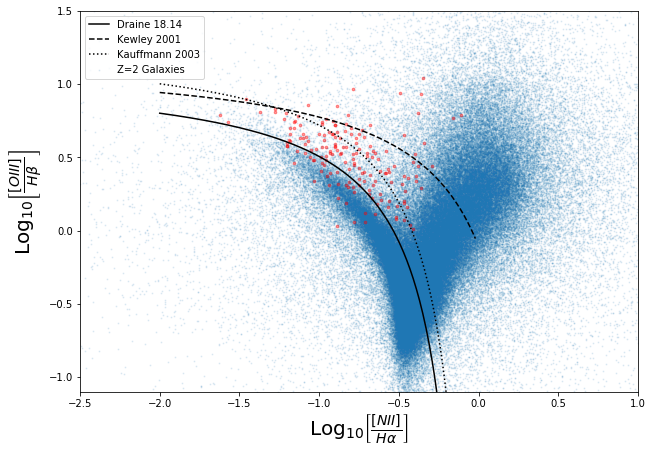

In [34]:
#Plotting for SDSS set

plt.figure(1,figsize=(10,7))

O3 = data['OIII_5007_FLUX']
N2 = data['NII_6584_FLUX']
Halpha = data['H_ALPHA_FLUX']
Hbeta = data['H_BETA_FLUX']
z = z = data['Z']

sdss_n2 = np.log10(N2/Halpha)
#sdss_n2 = sdss_n2[np.logical_not(np.isnan(sdss_n2))]

sdss_o3 = np.log10(O3/Hbeta)
#sdss_o3 = sdss_o3[np.logical_not(np.isnan(sdss_o3))]

print(np.shape(sdss_n2), np.shape(sdss_o3))

plt.scatter(np.log10(N2/Halpha),np.log10(O3/Hbeta),s=1,alpha=0.1, label='Z=2 Galaxies')

#plotting z~2 galaxies

Oiii = data2['log([OIII]/Hb)']
Nii = data2['log([NII]/Ha)']
plt.scatter(Nii,Oiii,s=7, color='r',marker='o',alpha=0.4)

#Overplotting boundary lines
vals = np.arange(-2.0,-0.01,0.01)
plt.plot(vals, 1.1-0.6/(0.01-vals),color='black',label="Draine 18.14") # Boundary from Draine 18.14
plt.plot(vals, 1.19+0.61/(vals-0.47),color='black',linestyle='dashed', label="Kewley 2001") 
plt.plot(vals, 1.3+0.61/(vals-0.05),color='black',linestyle='dotted', label="Kauffmann 2003") 
plt.legend() 

plt.xlabel('Log$_{10}\\left[ \\frac{[NII]}{H \\alpha}\\right] $',fontsize=20)
plt.ylabel('Log$_{10}\\left[ \\frac{[OIII]}{H \\beta}\\right] $',fontsize=20)
plt.ylim(-1.1,1.5)
plt.xlim(-2.5,1.0)
plt.show()

#Determining Fractions of Starburst (using Eq 18.14) and AGN

o3_vals = 1.1-0.6/(0.01-sdss_n2)

#s_bursts = [sdss_o3 < o3_vals] There seems to be an unequal number of NAN's in for both arrays?


I was able to do the plotting bit of this assignment but then getting the fractional number of starbursts and AGN was difficult due to handling NAN's. Somewhere there are '0' values for H$\alpha$ and H$\beta$ I think?